In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## a) load/merge data and visualize logerror

In [2]:
# load data into DataFrames
X1 = pd.read_csv('train.csv')
X2 = pd.read_csv('properties.csv')
df = pd.merge(X1, X2, on=['id'])
cols = df.columns.tolist()
print(df)

             id  logerror transactiondate  airconditioningtypeid  \
0      14366692   -0.1684          1/1/16                    NaN   
1      14739064   -0.0030          1/2/16                    NaN   
2      10854446    0.3825          1/3/16                    NaN   
3      11672170   -0.0161          1/3/16                    1.0   
4      12524288   -0.0419          1/3/16                    NaN   
...         ...       ...             ...                    ...   
31720  12756771    0.0658        12/30/16                    NaN   
31721  11295458   -0.0294        12/30/16                    1.0   
31722  11308315    0.0070        12/30/16                    1.0   
31723  11703478    0.0431        12/30/16                    NaN   
31724  12566293    0.4207        12/30/16                    NaN   

       architecturalstyletypeid  basementsqft  bathroomcnt  bedroomcnt  \
0                           NaN           NaN          3.5         4.0   
1                           NaN    

In [3]:
# eliminate outliers

logerr = df.loc[:,"logerror"]
per_min = np.percentile(logerr,1)
per_max = np.percentile(logerr,99)
df.loc[(df.logerror <= per_min),'logerror']=per_min
df.loc[(df.logerror >= per_max),'logerror']=per_max




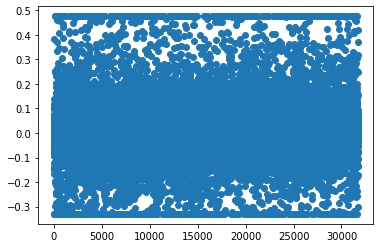

In [4]:
# scatter of logerr
logerr = df.loc[:,"logerror"]
x_axis = [i for i in range(logerr.shape[0])]
plt.scatter(x_axis,logerr)
plt.show()

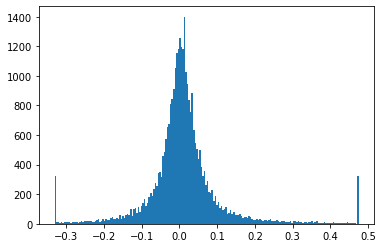

In [5]:
# histogram of logerr

plt.hist(logerr,bins='auto')
plt.show()

## b) data cleaning

In [6]:
# build new data frame
cols = np.array(df.columns) 
cols = cols.reshape(-1,1)

nan = np.array(df.isna().sum())
nan = nan.reshape(-1,1)

data = np.concatenate((cols,nan),axis=1)
df1 = pd.DataFrame(data, columns = ['column_name','missing_count'])
print(df1)

                     column_name missing_count
0                             id             0
1                       logerror             0
2                transactiondate             0
3          airconditioningtypeid         21563
4       architecturalstyletypeid         31628
5                   basementsqft         31711
6                    bathroomcnt             0
7                     bedroomcnt             0
8            buildingclasstypeid         31717
9          buildingqualitytypeid         11488
10             calculatedbathnbr           414
11                    decktypeid         31502
12      finishedfloor1squarefeet         29381
13  calculatedfinishedsquarefeet           228
14          finishedsquarefeet12          1647
15          finishedsquarefeet13         31711
16          finishedsquarefeet15         30454
17          finishedsquarefeet50         29381
18           finishedsquarefeet6         31591
19                          fips             0
20           

In [7]:
# fill missing data
miss = nan/logerr.shape[0]
df1['missing_ratio'] = miss

col = list(df.columns)

df.fillna(value=df.mean(), inplace=True)
print(df1)

                     column_name missing_count  missing_ratio
0                             id             0       0.000000
1                       logerror             0       0.000000
2                transactiondate             0       0.000000
3          airconditioningtypeid         21563       0.679685
4       architecturalstyletypeid         31628       0.996942
5                   basementsqft         31711       0.999559
6                    bathroomcnt             0       0.000000
7                     bedroomcnt             0       0.000000
8            buildingclasstypeid         31717       0.999748
9          buildingqualitytypeid         11488       0.362112
10             calculatedbathnbr           414       0.013050
11                    decktypeid         31502       0.992971
12      finishedfloor1squarefeet         29381       0.926115
13  calculatedfinishedsquarefeet           228       0.007187
14          finishedsquarefeet12          1647       0.051915
15      

/tmp/ipykernel_2883/200262522.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(value=df.mean(), inplace=True)


## c) univariate analysis

                              logerror
id                            0.006562
logerror                      1.000000
airconditioningtypeid         0.006328
architecturalstyletypeid     -0.001234
basementsqft                  0.005239
bathroomcnt                   0.033445
bedroomcnt                    0.032168
buildingclasstypeid                NaN
buildingqualitytypeid        -0.001840
calculatedbathnbr             0.034345
decktypeid                         NaN
finishedfloor1squarefeet      0.000807
calculatedfinishedsquarefeet  0.042841
finishedsquarefeet12          0.039504
finishedsquarefeet13          0.012608
finishedsquarefeet15          0.014687
finishedsquarefeet50          0.000621
finishedsquarefeet6          -0.000656
fips                          0.007863
fireplacecnt                  0.005099
fullbathcnt                   0.032986
garagecarcnt                 -0.000039
garagetotalsqft               0.005227
heatingorsystemtypeid        -0.019511
latitude                 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, '(logerror, logerror)'),
  Text(1, 0, '(logerror, calculatedfinishedsquarefeet)'),
  Text(2, 0, '(logerror, finishedsquarefeet12)'),
  Text(3, 0, '(logerror, calculatedbathnbr)'),
  Text(4, 0, '(logerror, bathroomcnt)'),
  Text(5, 0, '(logerror, fullbathcnt)'),
  Text(6, 0, '(logerror, bedroomcnt)'),
  Text(7, 0, '(logerror, yearbuilt)'),
  Text(8, 0, '(logerror, finishedsquarefeet15)'),
  Text(9, 0, '(logerror, finishedsquarefeet13)'),
  Text(10, 0, '(logerror, numberofstories)'),
  Text(11, 0, '(logerror, roomcnt)'),
  Text(12, 0, '(logerror, censustractandblock)'),
  Text(13, 0, '(logerror, fips)'),
  Text(14, 0, '(logerror, rawcensustractandblock)'),
  Text(15, 0, '(logerror, longitude)'),
  Text(16, 0, '(logerror, id)'),
 

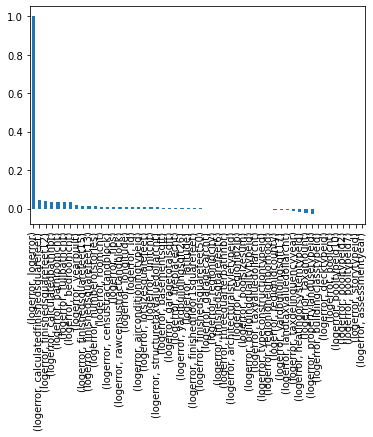

In [8]:
# make bar chart
correlation_df = df.corr()
xcorr_logerr = correlation_df[['logerror']]
#xcorr_logerr = np.sort(xcorr_logerr)
print(xcorr_logerr)
s = xcorr_logerr.unstack()
so = s.sort_values(kind="quicksort",ascending=False)
#print(so)
ax = so.plot.bar(x='lab', y='val', rot=0)
plt.xticks(rotation=90)

# explain reason
The correlation values of some fields do not exist because they do not have numerical values that can be compared with logerror field 

## d) non-linear regression model

In [9]:
# drop categorical features 
# ("hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag") 
# drop "id" and "transactiondate"
df = df.drop(["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag","id","transactiondate"], axis=1)
print(df)

       logerror  airconditioningtypeid  architecturalstyletypeid  \
0       -0.1684               1.809683                  7.453608   
1       -0.0030               1.809683                  7.453608   
2        0.3825               1.809683                  7.453608   
3       -0.0161               1.000000                  7.453608   
4       -0.0419               1.809683                  7.453608   
...         ...                    ...                       ...   
31720    0.0658               1.809683                  7.453608   
31721   -0.0294               1.000000                  7.453608   
31722    0.0070               1.000000                  7.453608   
31723    0.0431               1.809683                  7.453608   
31724    0.4207               1.809683                  7.453608   

       basementsqft  bathroomcnt  bedroomcnt  buildingclasstypeid  \
0        670.571429          3.5         4.0                  4.0   
1        670.571429          1.0         2.0 

In [10]:
# split and train
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df.drop('logerror',axis=1)
Y = df['logerror']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

regr = RandomForestRegressor(max_depth=60, random_state=0)
regr.fit(X_train, y_train)
#regr.predict(X)

RandomForestRegressor(max_depth=60, random_state=0)

0.010539725965580327


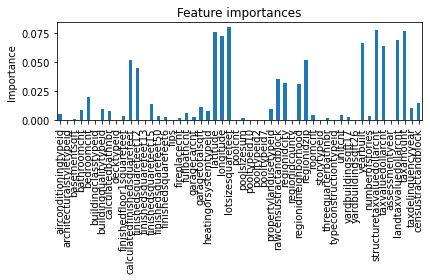

In [11]:
# report importances and mse
from sklearn import metrics
importances = regr.feature_importances_
#std = np.std([tree.feature_importances_ for tree in regr.estimators_], axis=0)

col_forest = list(X.columns)
forest_importances = pd.Series(importances, index=col_forest)

fig, ax = plt.subplots()
#forest_importances.plot.bar(yerr=std, ax=ax)
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Importance")
fig.tight_layout()


y_pred = regr.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print(mse)

## e) KFold

In [12]:
# KFold, k = 5
from sklearn.model_selection import KFold
X_new = X_train[0:500]
Y_new = y_train[0:500]
#print(X_new)
df2 = pd.concat([X_new, Y_new], axis = 1)
print(df2)
kf = KFold(n_splits=5)
result = next(kf.split(df2), None)
#print(result)

train = df2.iloc[result[0]]

test = df2.iloc[result[1]]
kf.get_n_splits(X_new)
#print(train)

X_train = train.drop('logerror',axis=1)
y_train = train['logerror']

X_test = test.drop('logerror',axis=1)
y_test = test['logerror']

regr = RandomForestRegressor(max_depth=60, random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
print(mse)


       airconditioningtypeid  architecturalstyletypeid  basementsqft  \
26942               1.000000                  7.453608    670.571429   
17404              13.000000                  7.453608    670.571429   
5331                1.809683                  7.453608    670.571429   
15102               1.809683                  7.453608    670.571429   
18154               1.809683                  7.453608    670.571429   
...                      ...                       ...           ...   
11592               1.000000                  7.453608    670.571429   
30107               1.809683                  7.453608    670.571429   
31683               1.809683                  7.453608    670.571429   
18823               1.000000                  7.453608    670.571429   
12148               1.000000                  7.453608    670.571429   

       bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
26942          3.0         3.0                  4.0      

In [13]:
# Run d2 for 100 times
for i in range(100):

    X_train, X_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.30, random_state=i)

    regr = RandomForestRegressor(max_depth=60, random_state=i)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    print(i,":",mse)

0 : 0.010233513417666632
1 : 0.005108430900232106
2 : 0.009634336840786633
3 : 0.010118245677590447
4 : 0.008566002049851813
5 : 0.006589654806678029
6 : 0.007681687947687689
7 : 0.008660205272937321
8 : 0.0075995380785147375
9 : 0.008784481245864633
10 : 0.008078936953926186
11 : 0.008215746686198306
12 : 0.00753353614548122
13 : 0.009476113458204611
14 : 0.008002206288651035
15 : 0.008296460523978196
16 : 0.008011908134324267
17 : 0.009227677366368321
18 : 0.006694427857797152
19 : 0.010897459397215047
20 : 0.0056240513890911895
21 : 0.0077076243626937125
22 : 0.008358993685660765
23 : 0.008953507585532462
24 : 0.010166570983012286
25 : 0.007353308732289599
26 : 0.005315682842353886
27 : 0.005078710862257142
28 : 0.007342635070081931
29 : 0.010183467789843723
30 : 0.006321453612563781
31 : 0.011975427209279965
32 : 0.00963518817577152
33 : 0.009259872114793077
34 : 0.010560122829747881
35 : 0.006102834615063446
36 : 0.008765718284728047
37 : 0.00678760325146843
38 : 0.008702411575237

The value of mean squared error is lower in case of cross-validation even though the model is trained using less number of datapoints. This means that the cross-validation method trains the model better. It trains a more robust model that performs well with the test set too. This also means that the including all the data points results in a more over-fitted model. 

Cross-validation method ensures a more accurate estimate of test accuracy. It is also efficient in using data for both training and testing purposes.